In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#grabbing the mnist dataset
train_data=pd.read_csv("MNIST(Ass2&3)/mnist_train.csv")
test_data=pd.read_csv("MNIST(Ass2&3)/mnist_test.csv")

In [4]:
X_train=train_data.drop("label",axis=1)
X_train=X_train/255.0
X_test=test_data.drop("label",axis=1)
X_test=X_test/255.0
Y_train=pd.DataFrame(train_data["label"])
Y_test=pd.DataFrame(test_data["label"])
X_test

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print(Y_train.shape)

(60000, 1)


In [6]:
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [7]:
adm=Adam(0.01)
epochs=13
model.compile(loss="sparse_categorical_crossentropy",optimizer=adm,metrics=["accuracy"])
tf=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=epochs,batch_size=64)

Epoch 1/13


938/938 [==============================] - 4s 4ms/step - loss: 0.2363 - accuracy: 0.9297 - val_loss: 0.1472 - val_accuracy: 0.9546
Epoch 2/13
938/938 [==============================] - 3s 4ms/step - loss: 0.1461 - accuracy: 0.9577 - val_loss: 0.1516 - val_accuracy: 0.9598
Epoch 3/13
938/938 [==============================] - 3s 4ms/step - loss: 0.1221 - accuracy: 0.9648 - val_loss: 0.1350 - val_accuracy: 0.9644
Epoch 4/13
938/938 [==============================] - 3s 4ms/step - loss: 0.1091 - accuracy: 0.9685 - val_loss: 0.1399 - val_accuracy: 0.9651
Epoch 5/13
938/938 [==============================] - 3s 3ms/step - loss: 0.1050 - accuracy: 0.9712 - val_loss: 0.1540 - val_accuracy: 0.9652
Epoch 6/13
938/938 [==============================] - 3s 4ms/step - loss: 0.0938 - accuracy: 0.9735 - val_loss: 0.1126 - val_accuracy: 0.9712
Epoch 7/13
938/938 [==============================] - 3s 3ms/step - loss: 0.0851 - accuracy: 0.9768 - val_loss: 0.1500 - val_accuracy: 0.9649
Epoc

In [8]:
predictions=model.predict(X_test,batch_size=128)
print(classification_report(Y_test,predictions.argmax(axis=1)))

79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.98      0.94      0.96      1010
           4       0.96      0.98      0.97       982
           5       0.96      0.95      0.96       892
           6       0.98      0.97      0.97       958
           7       0.98      0.97      0.98      1028
           8       0.90      0.98      0.94       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



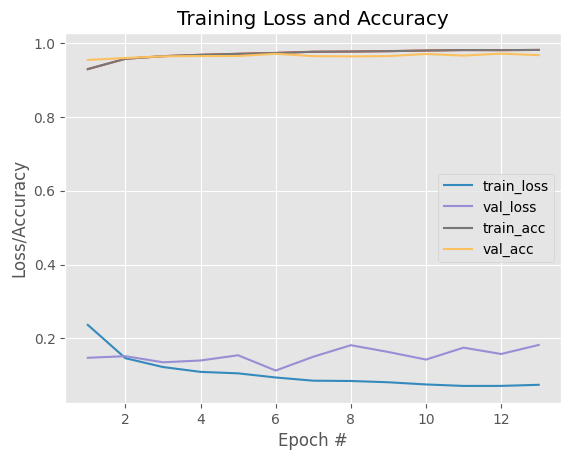

In [11]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(1,epochs+1),tf.history["accuracy"])
plt.plot(np.arange(1, epochs+1), tf.history["loss"], label="train_loss")
plt.plot(np.arange(1, epochs+1), tf.history["val_loss"], label="val_loss")
plt.plot(np.arange(1, epochs+1), tf.history["accuracy"], label="train_acc")
plt.plot(np.arange(1, epochs+1), tf.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()